# Problem 1 Assignment 1

In this notebook we perform an empirial analysis of the expected value of the optimal strategy for the stock trading problem.


## Setting things up

In [29]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math

def random_instance(n):
    """ creates random instance of size n """

    return [ random.randint(-1,1) for i in range(n) ] 


def mean_value(instance_generator, function, num_runs = 100):
    """ run function num_runs times on generated instances, return the mean of the returned values """

    ans = 0
    for _ in range(num_runs):
        ans += function(instance_generator())

    return ans / num_runs


def plot_consecutive_ratios(sizes, runtimes, plotcolor='blue'):

    ratios = []
    for i in range(1,len(runtimes)):
        ratios.append(runtimes[i] / runtimes[i-1])

    x = sizes[1:len(runtimes)]
    y = ratios 
    plt.scatter(x,y,color=plotcolor)
    plt.xscale('log')
    plt.xlabel('size of instance')
    plt.ylabel('T(2n)/T(n)')
    plt.xlim((2, 2 * max(sizes)))

In [30]:
def naive(A):
    """ find max A[i] + ... + A[j] : 0 <= i < j < n"""

    curr_val = 0
    curr_ans = (None, None)
    n = len(A)

    for i in range(0, n):
        for j in range(i+1, n):
            aux = sum(A[x] for x in range(i, j+1))
            if aux > curr_val:
                curr_val = aux
                curr_ans = (i, j)
            
    return curr_val

def preprocessing(A):
    """ find max A[i] + ... + A[j] : 0 <= i < j < n"""

    curr_val = 0
    curr_ans = (None, None)
    n=len(A)

    # compute B[i] = A[0] + .. + A[i-1]          for 0 <= i <= n
    B = [None] * (n+1)
    B[0] = 0
    for i in range(0, n):
        B[i+1] = B[i] + A[i]
    for i in range(0, n):
        for j in range(i+1, n):
            aux = B[j + 1] - B[i]
            if aux > curr_val:
                curr_val = aux
                curr_ans = (i, j)

    return curr_val


def reuse_computation(A):
    """ find max A[i] + ... + A[j] : 0 <= i < j < n"""

    curr_val = 0
    curr_ans = (None, None)
    n=len(A)

    # compute B[i] = A[0] + .. + A[i-1] 
    B = [None] * (n+1)
    B[0] = 0
    for i in range(0, n):
        B[i+1] = B[i] + A[i]

    #   compute C[i]= { max B[j+1] for i < j < n }    for 0 <= i < n-1
    C = [None] * (n-1)
    C[n-2] = B[n]
    for i in range(n-3, -1, -1):
        C[i] = max(C[i+1], B[i+2])

    for i in range(0, n-1):
        curr_val = max(curr_val, C[i] - B[i])

    return curr_val

## Expected value optimal strategy

Let $T(n)$ be the expected value of the optimal strategy on a random instance of size $n$.

In [85]:
sizes = [ 2**i for i in range(1, 16)]
T = [ mean_value(lambda : random_instance(size), reuse_computation) for size in sizes ]

Let us plot $T(n)$ on a log-log scale. If there is a linear dependency, then probably $T(n) = \Theta(n^\alpha)$ for some $\alpha >0$.

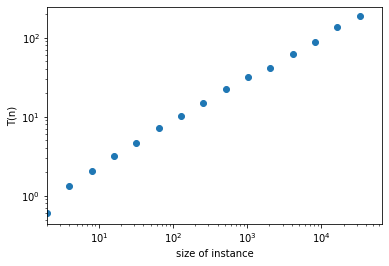

In [86]:
fig = plt.scatter(sizes, T)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('size of instance')
plt.ylabel('T(n)')
plt.xlim((2, 2 * max(sizes)))
plt.savefig('log-log.pdf')

It looks like there is a strong linear dependency between $\log T(n)$ and $\log n$. In fact it seems like $\log T(n) \approx 0.5 \log n$. If that is the case then $T(n) = O(\sqrt{n})$.

If that is the case then we would expect $\displaystyle \lim_{n \rightarrow \infty} \frac{T(2n)}{T(n)} = 2 ^{1/2} \approx 1.41$. Which is indeed what see:

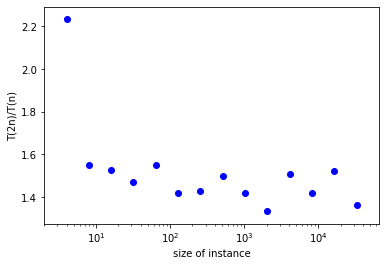

In [87]:
plot_consecutive_ratios(sizes, T)
plt.savefig('doubling.pdf')

To confirm our guess, we can plot $T(n) / \sqrt{n}$.

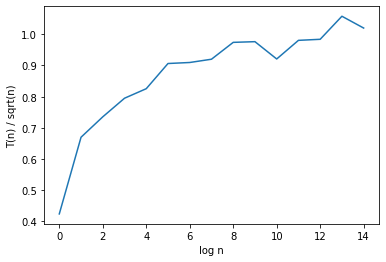

In [88]:
guess = lambda n: math.sqrt(n)
ratios_linear =[T_n / guess(n) for (n, T_n) in zip(sizes, T)]
plt.xlabel('log n')
plt.ylabel('T(n) / sqrt(n)')
plt.plot(ratios_linear)
plt.savefig('guess.pdf')

It seems like not only $T(n) = \Theta(n^{1/2})$, but the plot suggests that $T(n) = \sqrt{n} + o(1)$, where $o(1)$ denotes a lower order function that tends to 0 as $n \rightarrow \infty$.